Found 1419 files belonging to 4 classes.


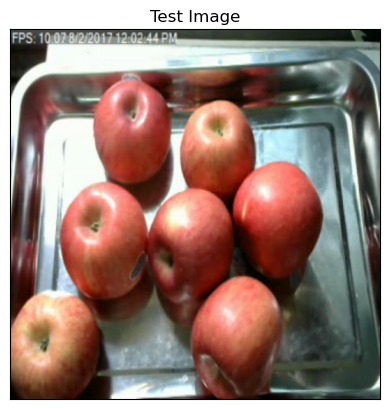

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Freshness Category: FRESH (75-100% FI)
Fruit Type: apple
Remaining Shelf Life: 7-14 DAYS


In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

# Load the trained CNN model
cnn = tf.keras.models.load_model(r'C:\Users\lenovo\Downloads\trained_model5.h5')  # Adjust the path to the model

# Define the test set directory path
test_dir = r'C:\Users\lenovo\Desktop\ezyzip\test'  # Adjust this path to where your test images are stored

# Load test images (with similar configuration as before)
test_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Test Image Visualization
image_path = r'C:\Users\lenovo\Desktop\ezyzip\test\FRESH (75-100% FI)\apple(7-14 DAYS)\freshApple-518-_png_jpg.rf.aa0765414906e96dcbd7bc62f6b3ea95.jpg'  # Adjust to your test image location

# Reading the image using OpenCV
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly with Matplotlib
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.show()

# Extracting information from the file path
path_parts = image_path.split(os.sep)  # Use os.sep to handle system-specific path separators
freshness_category = path_parts[-3]  # Folder containing freshness info (e.g., MODERATELY FRESH(50-74% FI))
fruit_info = path_parts[-2].split("(")[0].strip()  # Extract fruit name (e.g., Apple)
shelf_life = path_parts[-2].split("(")[1].split(")")[0].strip() if "(" in path_parts[-2] else "Unknown"  # Extract shelf life info

# Preprocess the image for model prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch
predictions = cnn.predict(input_arr)

# Get predicted category
result_index = np.argmax(predictions[0])
predicted_category = test_set.class_names[result_index]

# Display results
print(f"Predicted Freshness Category: {predicted_category}")
print(f"Fruit Type: {fruit_info}")
print(f"Remaining Shelf Life: {shelf_life}")
